<a href="https://colab.research.google.com/github/ndb796/AI-Theory-and-Practical-Project/blob/master/Linear%20Regression%20%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0%20%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression 바닥부터 구현

* Linear Regression을 Python만을 이용하여 구현합니다.

학습 목적의 데이터 준비

|하루 노동 시간| 하루 매출 |
|:--------|:--------:|
| 1 | 25,000 |
| 2 | 55,000 |
| 3 | 75,000 |
| 4 | 110,000 |
| 5 | 128,000 |
| 6 | 155,000 |
| 7 | 180,000 |

* 목표: 하루 노동 시간이 8시간일 때 하루 매출은 얼마가 될까?

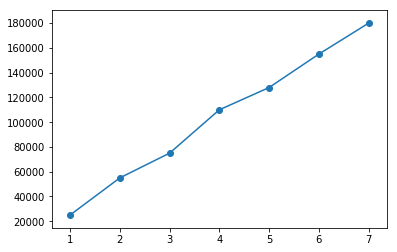

In [36]:
import matplotlib.pyplot as plt

X = [1, 2, 3, 4, 5, 6, 7]
Y = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

plt.plot(X, Y)
plt.scatter(X, Y)

가설 클래스를 정의합니다.

* Forward: 모델에서 정방향으로(왼쪽에서 오른쪽으로) 입력을 받아 결과를 출력하는 과정

In [0]:
# 가설 (학습 시킬 대상)
class H():
    def __init__(self, w):
        self.w = w
    # 결과를 반환하는 함수
    def forward(self, x):
        return self.w * x
    # 가설의 비용을 구하는 함수 (낮추어야 할 대상)
    def get_cost(self, X, Y):
        cost = 0
        for i in range(len(X)):
            cost += (self.forward(X[i]) - Y[i]) ** 2
        cost = cost / len(X)
        return cost
    # 기울기를 계산하는 함수
    def get_gradient(self, X, Y):
        cost = self.get_cost(X, Y)
        dw = 0.001
        self.w = self.w + dw
        next_cost = self.get_cost(X, Y)
        self.w = self.w - dw
        dcost = next_cost - cost
        gradient = dcost / dw
        return gradient, next_cost
    # 미분으로 기울기를 계산하는 함수
    def get_gradient_using_derivative(self, X, Y):
        gradient= 0
        for i in range(len(X)):
            gradient += (h.forward(X[i]) - Y[i]) * X[i]
        gradient = gradient / len(X)
        cost = self.get_cost(X, Y)
        return gradient, cost
    # w 값을 변경하는 함수
    def set_w(self, w):
        self.w = w
    # w 값을 반환하는 함수
    def get_w(self):
        return self.w

W에 따른 비용 확인하기

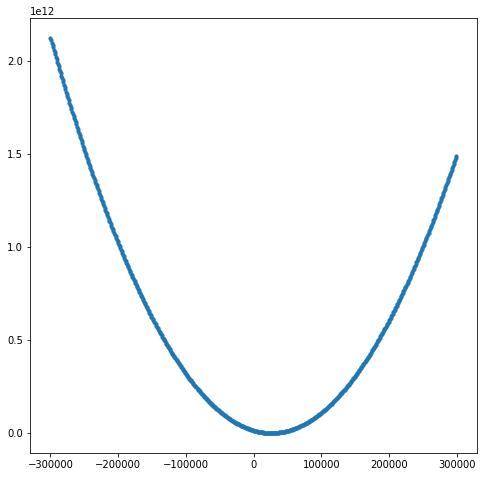

In [23]:
cost_list = []
w_list = []

# w를 -300,000부터 300,000까지 바꾸어 보며 비용 확인
for i in range(-300, 300):
    w = i * 1000
    h = H(w)
    cost = h.get_cost(X, Y)
    w_list.append(w)
    cost_list.append(cost)

# 결과적으로 약 25,000 정도일 때 최소 비용임을 확인
plt.figure(figsize=(8, 8))
plt.scatter(w_list, cost_list, s=10)

기본적인 기울기 함수를 이용하여 학습을 진행합니다.

In [37]:
w = 4
h = H(w)
learning_rate = 0.001
    
for i in range(1001):
    gradient, cost = h.get_gradient(X, Y)
    h.set_w(h.get_w() + learning_rate * -gradient)
    if i % 100 == 0:
        print("[ epoch: %d, cost: %.2f ]" % (i, cost))
        print("w = %.2f, w_gradient = %.2f" % (h.get_w(), gradient))
        
print("f(x) = %.2fx" %(h.get_w()))
print("예측값: [%.2f]" %(h.forward(8)))

[ epoch: 0, cost: 13450707854.45 ]
w = 1040.98, w_gradient = -1036982.84
[ epoch: 100, cost: 12866409.33 ]
w = 25508.71, w_gradient = -17494.23
[ epoch: 200, cost: 9041904.97 ]
w = 25921.49, w_gradient = -295.13
[ epoch: 300, cost: 9040816.63 ]
w = 25928.45, w_gradient = -4.98
[ epoch: 400, cost: 9040816.33 ]
w = 25928.57, w_gradient = -0.08
[ epoch: 500, cost: 9040816.33 ]
w = 25928.57, w_gradient = -0.00
[ epoch: 600, cost: 9040816.33 ]
w = 25928.57, w_gradient = -0.00
[ epoch: 700, cost: 9040816.33 ]
w = 25928.57, w_gradient = 0.00
[ epoch: 800, cost: 9040816.33 ]
w = 25928.57, w_gradient = 0.00
[ epoch: 900, cost: 9040816.33 ]
w = 25928.57, w_gradient = 0.00
[ epoch: 1000, cost: 9040816.33 ]
w = 25928.57, w_gradient = 0.00
f(x) = 25928.57x
예측값: [207428.57]


편미분을 활용한 기울기 함수를 이용하여 학습을 진행할 수도 있습니다.

In [38]:
w = 4
h = H(w)
learning_rate = 0.001
    
for i in range(1001):
    gradient, cost = h.get_gradient_using_derivative(X, Y)
    h.set_w(h.get_w() + learning_rate * -gradient)
    if i % 100 == 0:
        print("[ epoch: %d, cost: %.2f ]" % (i, cost))
        print("w = %.2f, w_gradient = %.2f" % (h.get_w(), gradient))
        
print("f(x) = %.2fx" %(h.get_w()))
print("예측값: [%.2f]" %(h.forward(8)))

[ epoch: 0, cost: 13450708891.43 ]
w = 522.49, w_gradient = -518491.43
[ epoch: 100, cost: 245452156.72 ]
w = 22559.23, w_gradient = -68762.10
[ epoch: 200, cost: 13198806.36 ]
w = 25481.73, w_gradient = -9119.20
[ epoch: 300, cost: 9113946.83 ]
w = 25869.31, w_gradient = -1209.38
[ epoch: 400, cost: 9042102.54 ]
w = 25920.71, w_gradient = -160.39
[ epoch: 500, cost: 9040838.95 ]
w = 25927.53, w_gradient = -21.27
[ epoch: 600, cost: 9040816.72 ]
w = 25928.43, w_gradient = -2.82
[ epoch: 700, cost: 9040816.33 ]
w = 25928.55, w_gradient = -0.37
[ epoch: 800, cost: 9040816.33 ]
w = 25928.57, w_gradient = -0.05
[ epoch: 900, cost: 9040816.33 ]
w = 25928.57, w_gradient = -0.01
[ epoch: 1000, cost: 9040816.33 ]
w = 25928.57, w_gradient = -0.00
f(x) = 25928.57x
예측값: [207428.57]


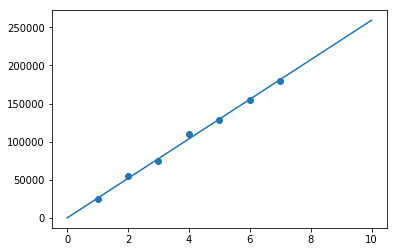

In [34]:
x_pred = [i for i in range(11)]
y_pred = [h.get_w() * i for i in range(11)]
plt.plot(x_pred, y_pred)
plt.scatter(X, Y)